In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

project_path = "/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/"
dataset_path = os.path.join(project_path, "dataset/Product_Reviews.csv")

# Create directories if not exist
os.makedirs(project_path, exist_ok=True)

print("Project directory:", project_path)

Project directory: /content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/


### Load data

In [3]:
import pandas as pd

# Load your dataset
df = pd.read_csv(dataset_path)
print(df.shape)
df.head()

(29046, 6)


,Category,Rating,Review,Sentiment,Emotion,Decisions
0,Amazon Alexa,4,I liked this gen very much. The only disadvant...,Neutral,Sadness,"{""Overall Quality"": ""Positive"", ""Voice Recogni..."
1,Amazon Alexa,3,This latest version of Echo Dot may be a bette...,Negative,Anger,"{""Voice Recognition"": ""Negative"", ""Music Strea..."
2,Amazon Alexa,4,it could not be possible to reset it at my ne...,Negative,Sadness,"{""Functionality"": ""Negative""}"
3,Amazon Alexa,4,Nothing great then previous ones .,Neutral,Neutral,"{""Overall Quality"": ""Negative""}"
4,Amazon Alexa,4,AwesomeBut some time can not listenOver all good,Positive,Happiness,"{""Sound Quality"": ""Negative"", ""Overall Quality..."


In [4]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29046 entries, 0 to 29045
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Category   29046 non-null  object
 1   Rating     29046 non-null  int64 
 2   Review     29046 non-null  object
 3   Sentiment  29046 non-null  object
 4   Emotion    24003 non-null  object
 5   Decisions  1963 non-null   object
dtypes: int64(1), object(5)
memory usage: 1.3+ MB


### Data Preprocessing

In [5]:
# Check duplicate reviews
df[df['Review'].duplicated()].shape

(526, 6)

In [6]:
# Remove duplicate reviews
df.drop_duplicates(subset=['Review'], keep='first', inplace=True)
df.shape

(28520, 6)

In [7]:
!pip install emoji contractions bs4 nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 12.2 MB/s eta 0:00:00


In [8]:
import re
import string
import html
import emoji
import contractions
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from warnings import filterwarnings

filterwarnings('ignore')

In [9]:
# Download resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [10]:
# Initialize
lemmatizer = WordNetLemmatizer()

In [11]:
# 1: Lowercase
def to_lowercase(text):
    return text.lower()

# 2: Expand Contractions
def expand_contractions(text):
    return contractions.fix(text)

# 3: Remove HTML Tags
def remove_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

# 4: Remove Emojis
def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')

# 5: Normalize Clothing Sizes
def normalize_clothing_sizes(text):
    # Convert height in feet/inches to cm (approximate)
    pattern = re.compile(r"(\d)'\s?(\d{1,2})\"?")
    def convert(match):
        feet = int(match.group(1))
        inches = int(match.group(2))
        cm = round((feet * 12 + inches) * 2.54)
        return f"{cm} cm"
    return pattern.sub(convert, text)

# 6: Remove URLs
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text)

# 7: Remove Special Characters (but keep alphabets and category terms)
def remove_special_chars(text):
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Keep alphanumeric only
    return text

# 8: Normalize Whitespace & Line Breaks
def normalize_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

# 9: Lemmatization
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized)

In [12]:
# Data Cleaning Pipeline
def clean_review(text):
    if pd.isnull(text) or not isinstance(text, str):
        return ""

    text = to_lowercase(text)
    text = expand_contractions(text)
    text = remove_html(text)
    text = remove_emojis(text)
    text = normalize_clothing_sizes(text)
    text = remove_urls(text)
    text = remove_special_chars(text)
    text = normalize_whitespace(text)
    text = lemmatize_text(text)

    return text

In [13]:
# Apply Data Cleaning
df['Cleaned_Reviews'] = df['Review'].apply(clean_review)
df.head()

,Category,Rating,Review,Sentiment,Emotion,Decisions,Cleaned_Reviews
0,Amazon Alexa,4,I liked this gen very much. The only disadvant...,Neutral,Sadness,"{""Overall Quality"": ""Positive"", ""Voice Recogni...",i liked this gen very much the only disadvanta...
1,Amazon Alexa,3,This latest version of Echo Dot may be a bette...,Negative,Anger,"{""Voice Recognition"": ""Negative"", ""Music Strea...",this latest version of echo dot may be a bette...
2,Amazon Alexa,4,it could not be possible to reset it at my ne...,Negative,Sadness,"{""Functionality"": ""Negative""}",it could not be possible to reset it at my new...
3,Amazon Alexa,4,Nothing great then previous ones .,Neutral,Neutral,"{""Overall Quality"": ""Negative""}",nothing great then previous one
4,Amazon Alexa,4,AwesomeBut some time can not listenOver all good,Positive,Happiness,"{""Sound Quality"": ""Negative"", ""Overall Quality...",awesomebut some time can not listenover all good


In [14]:
df.head(20)

,Category,Rating,Review,Sentiment,Emotion,Decisions,Cleaned_Reviews
0,Amazon Alexa,4,I liked this gen very much. The only disadvant...,Neutral,Sadness,"{""Overall Quality"": ""Positive"", ""Voice Recogni...",i liked this gen very much the only disadvanta...
1,Amazon Alexa,3,This latest version of Echo Dot may be a bette...,Negative,Anger,"{""Voice Recognition"": ""Negative"", ""Music Strea...",this latest version of echo dot may be a bette...
2,Amazon Alexa,4,it could not be possible to reset it at my ne...,Negative,Sadness,"{""Functionality"": ""Negative""}",it could not be possible to reset it at my new...
3,Amazon Alexa,4,Nothing great then previous ones .,Neutral,Neutral,"{""Overall Quality"": ""Negative""}",nothing great then previous one
4,Amazon Alexa,4,AwesomeBut some time can not listenOver all good,Positive,Happiness,"{""Sound Quality"": ""Negative"", ""Overall Quality...",awesomebut some time can not listenover all good
5,Amazon Alexa,4,Freedom sale I brought this with light. Workin...,Positive,Happiness,"{""Functionality"": ""Positive""}",freedom sale i brought this with light working...
6,Amazon Alexa,4,Good product. Stayed upto the expectations. Co...,Neutral,Happiness,"{""Overall Quality"": ""Negative""}",good product stayed upto the expectation could...
7,Amazon Alexa,4,Very good connectivity with iPhone and android...,Positive,Happiness,"{""Connectivity"": ""Positive"", ""Sound Quality"": ...",very good connectivity with iphone and android...
8,Amazon Alexa,5,The sound is so amazing that you are lost in y...,Positive,Excitement,"{""Sound Quality"": ""Positive"", ""Design"": ""Posit...",the sound is so amazing that you are lost in y...
9,Amazon Alexa,3,I like everything of this product i use it for...,Positive,Happiness,"{""Overall Quality"": ""Positive""}",i like everything of this product i use it for...


### Sentiment Analysis

In [15]:
!pip install transformers datasets scikit-learn torch seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from transformers import (AutoTokenizer, AutoModelForSequenceClassification, Trainer,
                          TrainingArguments, DataCollatorWithPadding, EarlyStoppingCallback)

In [17]:
# Encode Label
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Sentiment'])
label2id = {label: idx for idx, label in enumerate(label_encoder.classes_)}
id2label = {idx: label for label, idx in label2id.items()}

In [18]:
df.head()

,Category,Rating,Review,Sentiment,Emotion,Decisions,Cleaned_Reviews,Label
0,Amazon Alexa,4,I liked this gen very much. The only disadvant...,Neutral,Sadness,"{""Overall Quality"": ""Positive"", ""Voice Recogni...",i liked this gen very much the only disadvanta...,1
1,Amazon Alexa,3,This latest version of Echo Dot may be a bette...,Negative,Anger,"{""Voice Recognition"": ""Negative"", ""Music Strea...",this latest version of echo dot may be a bette...,0
2,Amazon Alexa,4,it could not be possible to reset it at my ne...,Negative,Sadness,"{""Functionality"": ""Negative""}",it could not be possible to reset it at my new...,0
3,Amazon Alexa,4,Nothing great then previous ones .,Neutral,Neutral,"{""Overall Quality"": ""Negative""}",nothing great then previous one,1
4,Amazon Alexa,4,AwesomeBut some time can not listenOver all good,Positive,Happiness,"{""Sound Quality"": ""Negative"", ""Overall Quality...",awesomebut some time can not listenover all good,2


In [19]:
# Split & Convert to Dataset
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['Review'].tolist(), df['Label'].tolist(), test_size=0.2, stratify=df['Label'], random_state=42
)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_texts, train_labels, test_size=0.1, stratify=train_labels, random_state=42
)

train_dataset = Dataset.from_dict({"text": train_texts, "label": train_labels})
val_dataset = Dataset.from_dict({"text": val_texts, "label": val_labels})
test_dataset = Dataset.from_dict({"text": test_texts, "label": test_labels})
raw_datasets = DatasetDict({"train": train_dataset, "validation": val_dataset, "test": test_dataset})

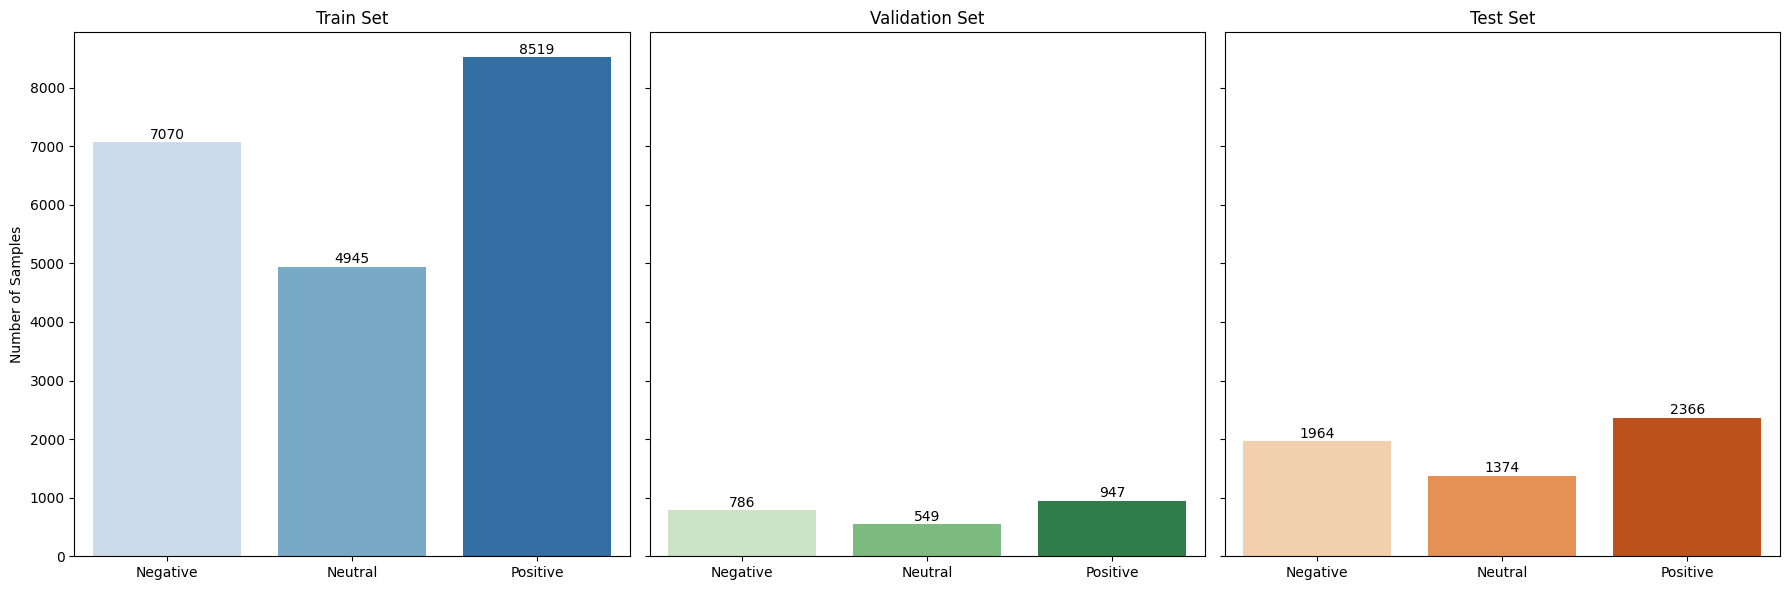

In [20]:
from collections import Counter

# Map numeric labels to readable names
label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

# Count label occurrences in each dataset
train_counts = Counter(train_labels)
val_counts = Counter(val_labels)
test_counts = Counter(test_labels)

# Convert counts to lists with label names
def get_counts_for_plot(counter):
    return [counter.get(label, 0) for label in sorted(counter.keys())]

train_data = get_counts_for_plot(train_counts)
val_data = get_counts_for_plot(val_counts)
test_data = get_counts_for_plot(test_counts)

labels = [label_map[l] for l in sorted(set(train_labels + val_labels + test_labels))]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Train Set
sns.barplot(x=labels, y=train_data, ax=axes[0], palette="Blues")
axes[0].set_title("Train Set")
axes[0].set_ylabel("Number of Samples")
for i, v in enumerate(train_data):
    axes[0].text(i, v + 10, str(v), ha='center', va='bottom')

# Validation Set
sns.barplot(x=labels, y=val_data, ax=axes[1], palette="Greens")
axes[1].set_title("Validation Set")
axes[1].set_ylabel("")
for i, v in enumerate(val_data):
    axes[1].text(i, v + 10, str(v), ha='center', va='bottom')

# Test Set
sns.barplot(x=labels, y=test_data, ax=axes[2], palette="Oranges")
axes[2].set_title("Test Set")
axes[2].set_ylabel("")
for i, v in enumerate(test_data):
    axes[2].text(i, v + 10, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [21]:
# Tokenization
def tokenize_function(example, tokenizer):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)

In [22]:
def train_model(model_name):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=3,
        id2label=id2label,
        label2id=label2id
    )

    # Tokenize datasets
    tokenized_datasets = raw_datasets.map(lambda x: tokenize_function(x, tokenizer), batched=True)

    # Define training arguments
    training_args = TrainingArguments(
        output_dir=os.path.join(project_path, f"notebook/{model_name}-sentiment"),
        eval_strategy="epoch",
        save_strategy="no",
        learning_rate=2e-5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=64,
        num_train_epochs=3,
        weight_decay=0.01,
        load_best_model_at_end=False,
        logging_dir='./logs',
        logging_steps=10,
        report_to="none"
    )

    # Define Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_datasets["train"],
        eval_dataset=tokenized_datasets["validation"],
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )

    # Train model
    trainer.train()

    # Evaluate
    predictions = trainer.predict(tokenized_datasets["test"])
    preds = np.argmax(predictions.predictions, axis=1)
    print("\nClassification Report:")
    print(classification_report(tokenized_datasets["test"]["label"], preds, target_names=label2id.keys()))
    print("Confusion Matrix:")
    # Confusion Matrix
    conf_mat = confusion_matrix(tokenized_datasets["test"]["label"], preds)
    sns.heatmap(conf_mat, annot=True, fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix for " + model_name)
    plt.show()

    return trainer, model

In [23]:
# Metrics Function
from sklearn.metrics import precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

#### BERT Model

=== Training BERT (bert-base-uncased) ===


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/20534 [00:00<?, ? examples/s]

Map:   0%|          | 0/2282 [00:00<?, ? examples/s]

Map:   0%|          | 0/5704 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.474900,0.370287,0.845749,0.849422,0.858946,0.845749
2,0.267800,0.410349,0.847064,0.845524,0.844780,0.847064
3,0.189500,0.510717,0.851008,0.852365,0.854188,0.851008



Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.87      0.87      1964
     Neutral       0.69      0.70      0.69      1374
    Positive       0.91      0.90      0.91      2366

    accuracy                           0.84      5704
   macro avg       0.82      0.82      0.82      5704
weighted avg       0.84      0.84      0.84      5704

Confusion Matrix:


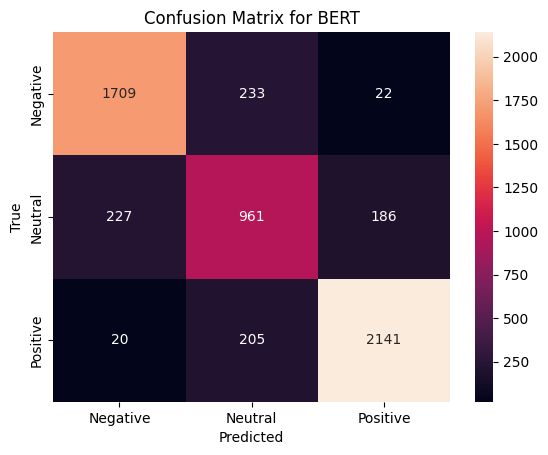

In [ ]:
print("=== Training BERT (bert-base-uncased) ===")
trainer_bert, model_bert = train_model("bert-base-uncased")

In [ ]:
# Save the model and tokenizer to a folder
save_path_bert = os.path.join(project_path, "notebook/BERT_model/")
model_bert.save_pretrained(save_path_bert)
trainer_bert.tokenizer.save_pretrained(save_path_bert)

Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.


('/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/BERT_model/tokenizer_config.json',
 '/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/BERT_model/special_tokens_map.json',
 '/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/BERT_model/vocab.txt',
 '/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/BERT_model/added_tokens.json',
 '/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/BERT_model/tokenizer.json')

#### RoBERTa Model


=== Training RoBERTa (roberta-base) ===


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/20534 [00:00<?, ? examples/s]

Map:   0%|          | 0/2282 [00:00<?, ? examples/s]

Map:   0%|          | 0/5704 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.440700,0.343927,0.865469,0.865715,0.866236,0.865469
2,0.269300,0.352818,0.868975,0.868052,0.867460,0.868975
3,0.206200,0.412469,0.871604,0.872077,0.872635,0.871604



Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.89      0.89      1964
     Neutral       0.73      0.72      0.73      1374
    Positive       0.92      0.93      0.92      2366

    accuracy                           0.86      5704
   macro avg       0.85      0.84      0.85      5704
weighted avg       0.86      0.86      0.86      5704

Confusion Matrix:


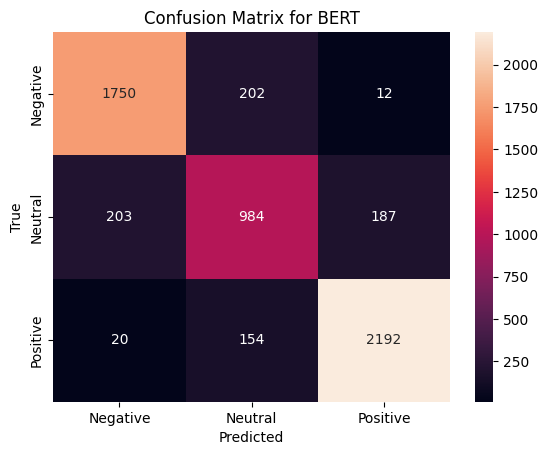

In [ ]:
print("\n=== Training RoBERTa (roberta-base) ===")
trainer_roberta, model_roberta = train_model("roberta-base")

In [ ]:
# Save the model and tokenizer to a folder
save_path_roberta = os.path.join(project_path, "notebook/RoBERTa_model/")
model_roberta.save_pretrained(save_path_roberta)
trainer_roberta.tokenizer.save_pretrained(save_path_roberta)

Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.


('/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/RoBERTa_model/tokenizer_config.json',
 '/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/RoBERTa_model/special_tokens_map.json',
 '/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/RoBERTa_model/vocab.json',
 '/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/RoBERTa_model/merges.txt',
 '/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/RoBERTa_model/added_tokens.json',
 '/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/RoBERTa_model/tokenizer.json')

#### DeBERTa V3 Model


=== Training DeBERTa (microsoft/deberta-v3-base) ===


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/20534 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/371M [00:00<?, ?B/s]

Map:   0%|          | 0/2282 [00:00<?, ? examples/s]

Map:   0%|          | 0/5704 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.366900,0.306799,0.876424,0.875515,0.875306,0.876424
2,0.269300,0.348826,0.868098,0.869875,0.873237,0.868098
3,0.115600,0.419546,0.873357,0.873556,0.873839,0.873357



Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.90      0.90      1964
     Neutral       0.74      0.72      0.73      1374
    Positive       0.92      0.93      0.92      2366

    accuracy                           0.87      5704
   macro avg       0.85      0.85      0.85      5704
weighted avg       0.87      0.87      0.87      5704

Confusion Matrix:


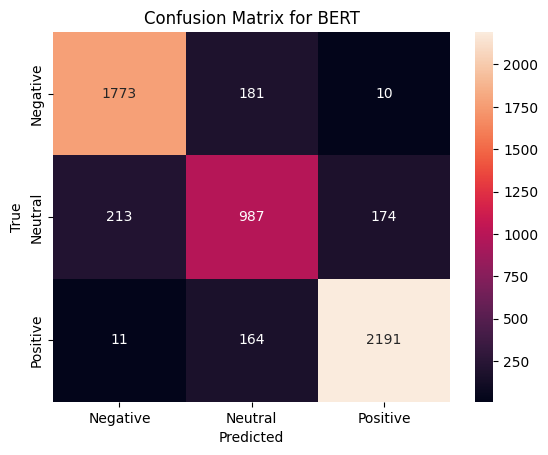

In [ ]:
print("\n=== Training DeBERTa (microsoft/deberta-v3-base) ===")
trainer_deberta, model_deberta = train_model("microsoft/deberta-v3-base")

In [ ]:
# Save the model and tokenizer to a folder
save_path_deberta = os.path.join(project_path, "notebook/DeBERTa_model/")
model_deberta.save_pretrained(save_path_deberta)
trainer_deberta.tokenizer.save_pretrained(save_path_deberta)

Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.


('/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/DeBERTa_model/tokenizer_config.json',
 '/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/DeBERTa_model/special_tokens_map.json',
 '/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/DeBERTa_model/spm.model',
 '/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/DeBERTa_model/added_tokens.json',
 '/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/DeBERTa_model/tokenizer.json')

### Hyper-parameter Tuning

In [24]:
!pip install evaluate optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 18.9 MB/s eta 0:00:00


In [25]:
import numpy as np
import optuna
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer
from datasets import load_metric, Dataset
from sklearn.model_selection import train_test_split

In [26]:
model_name = "microsoft/deberta-v3-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

In [27]:
# Tokenize all datasets
def tokenize_function(example):
    return tokenizer(
        example["text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

Map:   0%|          | 0/20534 [00:00<?, ? examples/s]

Map:   0%|          | 0/2282 [00:00<?, ? examples/s]

Map:   0%|          | 0/5704 [00:00<?, ? examples/s]

In [28]:
# Evaluation metrics
from evaluate import load

def compute_metrics(eval_pred):
  accuracy = load("accuracy")
  precision = load("precision")
  recall = load("recall")
  f1 = load("f1")

  logits, labels = eval_pred
  preds = np.argmax(logits, axis=-1)

  return {
        "accuracy": accuracy.compute(predictions=preds, references=labels)["accuracy"],
        "precision": precision.compute(predictions=preds, references=labels, average="weighted")["precision"],
        "recall": recall.compute(predictions=preds, references=labels, average="weighted")["recall"],
        "f1": f1.compute(predictions=preds, references=labels, average="weighted")["f1"]
  }

In [29]:
def model_init():
  return AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3,
                                                            id2label=id2label, label2id=label2id)

def hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 2e-5, 4e-5, log=True),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16]),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 2, 3),
        "weight_decay": trial.suggest_float("weight_decay", 0.01, 0.1),
    }

In [30]:
training_args = TrainingArguments(
    output_dir=os.path.join(project_path, f"notebook/optimized-sentiment"),
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    report_to="none"
)

trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
# Optimize
best_trial = trainer.hyperparameter_search(
    direction="maximize",
    hp_space=hp_space,
    n_trials=5,
    backend="optuna"
)

[I 2025-05-21 00:45:05,211] A new study created in memory with name: no-name-457efc98-6692-480d-9e21-0254640c0df9
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.441900,0.325556,0.869851,0.871630,0.869851,0.870482
2,0.272500,0.423371,0.882559,0.882421,0.882559,0.882458


[I 2025-05-21 01:11:29,037] Trial 0 finished with value: 3.5299973940508176 and parameters: {'learning_rate': 2.0937068030279726e-05, 'per_device_train_batch_size': 8, 'num_train_epochs': 2, 'weight_decay': 0.059676897748624204}. Best is trial 0 with value: 3.5299973940508176.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.446600,0.329364,0.866784,0.864320,0.866784,0.864883
2,0.258700,0.358381,0.865469,0.867043,0.865469,0.866118
3,0.147000,0.433742,0.880368,0.880438,0.880368,0.880308


[I 2025-05-21 01:45:31,554] Trial 1 finished with value: 3.5214822526577003 and parameters: {'learning_rate': 3.96224556273572e-05, 'per_device_train_batch_size': 16, 'num_train_epochs': 3, 'weight_decay': 0.07693059900646056}. Best is trial 0 with value: 3.5299973940508176.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.436100,0.321473,0.868536,0.866780,0.868536,0.867479
2,0.254400,0.373904,0.866345,0.869357,0.866345,0.867498
3,0.148900,0.449578,0.875986,0.876653,0.875986,0.876274


[I 2025-05-21 02:19:36,834] Trial 2 finished with value: 3.5048983669516685 and parameters: {'learning_rate': 2.8972678953274648e-05, 'per_device_train_batch_size': 16, 'num_train_epochs': 3, 'weight_decay': 0.0939503119679548}. Best is trial 0 with value: 3.5299973940508176.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.430800,0.297881,0.875986,0.873759,0.875986,0.874621
2,0.236100,0.336576,0.876424,0.876995,0.876424,0.876684


[I 2025-05-21 02:42:14,678] Trial 3 finished with value: 3.5065280557938903 and parameters: {'learning_rate': 3.422777371434136e-05, 'per_device_train_batch_size': 16, 'num_train_epochs': 2, 'weight_decay': 0.06312240736684813}. Best is trial 0 with value: 3.5299973940508176.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.437400,0.320217,0.865907,0.862613,0.865907,0.863725
2,0.256800,0.349502,0.868536,0.870602,0.868536,0.869286
3,0.150100,0.453969,0.875986,0.876067,0.875986,0.875945


[I 2025-05-21 03:16:05,159] Trial 4 finished with value: 3.5039837254989474 and parameters: {'learning_rate': 3.1312894420299876e-05, 'per_device_train_batch_size': 16, 'num_train_epochs': 3, 'weight_decay': 0.05354854040470624}. Best is trial 0 with value: 3.5299973940508176.


In [32]:
print("Best Trial: \n", best_trial)

Best Trial: 
 BestRun(run_id='0', objective=3.5299973940508176, hyperparameters={'learning_rate': 2.0937068030279726e-05, 'per_device_train_batch_size': 8, 'num_train_epochs': 2, 'weight_decay': 0.059676897748624204}, run_summary=None)


In [33]:
# Extract best parameters
best_params = best_trial.hyperparameters
best_params

{'learning_rate': 2.0937068030279726e-05,
 'per_device_train_batch_size': 8,
 'num_train_epochs': 2,
 'weight_decay': 0.059676897748624204}

In [34]:
# Define training arguments with best hyperparameters
training_args = TrainingArguments(
    output_dir=os.path.join(project_path, f"notebook/best-deberta-sentiment"),
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=best_params["learning_rate"],
    per_device_train_batch_size=best_params["per_device_train_batch_size"],
    num_train_epochs=best_params["num_train_epochs"],
    weight_decay=best_params["weight_decay"],
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    logging_dir='./logs',
    report_to="none"
)

# Reinitialize trainer with best params
trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Retrain the best model
trainer.train()

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.375500,0.325556,0.869851,0.871630,0.869851,0.870482
2,0.265400,0.423371,0.882559,0.882421,0.882559,0.882458


TrainOutput(global_step=5134, training_loss=0.3572435189556602, metrics={'train_runtime': 1592.6567, 'train_samples_per_second': 25.786, 'train_steps_per_second': 3.224, 'total_flos': 2701433905597440.0, 'train_loss': 0.3572435189556602, 'epoch': 2.0})


Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.91      0.89      1964
     Neutral       0.74      0.70      0.72      1374
    Positive       0.92      0.93      0.92      2366

    accuracy                           0.87      5704
   macro avg       0.85      0.85      0.85      5704
weighted avg       0.86      0.87      0.86      5704

Confusion Matrix:


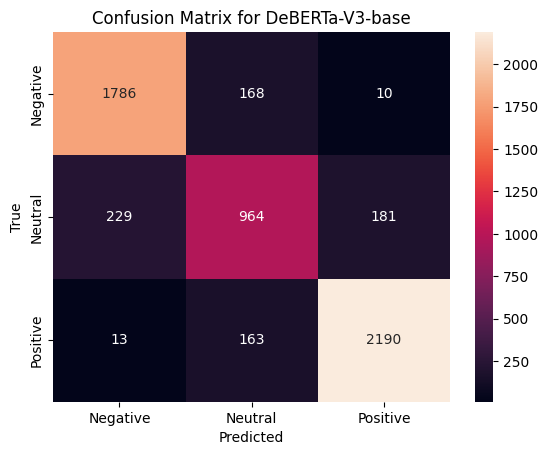

In [35]:
# Evaluate
predictions = trainer.predict(tokenized_datasets["test"])
preds = np.argmax(predictions.predictions, axis=1)
print("\nClassification Report:")
print(classification_report(tokenized_datasets["test"]["label"],
                            preds, target_names=label2id.keys()))
print("Confusion Matrix:")
# Confusion Matrix
conf_mat = confusion_matrix(tokenized_datasets["test"]["label"], preds)
sns.heatmap(conf_mat, annot=True, fmt="d", xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for DeBERTa-V3-base")
plt.show()

In [36]:
# Save the model and tokenizer to a folder
save_path_best = os.path.join(project_path, "notebook/best_DeBERTa_model/")
model_init().save_pretrained(save_path_best)
trainer.tokenizer.save_pretrained(save_path_best)

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.


('/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/best_DeBERTa_model/tokenizer_config.json',
 '/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/best_DeBERTa_model/special_tokens_map.json',
 '/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/best_DeBERTa_model/spm.model',
 '/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/best_DeBERTa_model/added_tokens.json',
 '/content/drive/MyDrive/MSc/Research/Sentiment_Emotion_Intelligence/notebook/best_DeBERTa_model/tokenizer.json')

### Load a Saved Model and Tokenizer

In [37]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F

# Load the saved BERT model and tokenizer
load_path = save_path_best
tokenizer = AutoTokenizer.from_pretrained(load_path)
model = AutoModelForSequenceClassification.from_pretrained(load_path)
model.eval()  # Set to evaluation mode

DebertaV2ForSequenceClassification(
  (deberta): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 768, padding_idx=0)
      (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-11): 12 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=768, out_features=768, bias=True)
              (key_proj): Linear(in_features=768, out_features=768, bias=True)
              (value_proj): Linear(in_features=768, out_features=768, bias=True)
              (pos_dropout): Dropout(p=0.1, inplace=False)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): Layer

In [38]:
def predict_sentiment(review_text):
    inputs = tokenizer(review_text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = F.softmax(logits, dim=-1)
        pred_class = torch.argmax(probs, dim=-1).item()
        confidence = torch.max(probs).item()

    label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return label_map[pred_class], confidence

In [39]:
# Example usage
review = "I love this product but this is little slow charges!"
predicted_label, confidence = predict_sentiment(review)
print(f"Predicted Sentiment: {predicted_label} (Confidence: {confidence:.2f})")

Predicted Sentiment: Negative (Confidence: 0.34)
